# Visualization

In [32]:
import pandas as pd
Data = pd.read_csv('formatted_data/formatted_data.csv')

In [33]:
Data.describe() # view data info

,Height_(cm),Weight_(KG),Arm_Span_(cm),Hardest_V_Grade_ever_climbed_,Hardest_V_Grade_climbed_in_the_Last_3_months,The_V_grade_you_can_send_90-100%_of_routes_,Sex_Male,Where_do_you_climb_Indoor Climbing only,Where_do_you_climb_Indoor and outdoor climbing,Where_do_you_climb_Outdoor Climbing only,...,other,route climbing intervals,systems boards,threshold intervals,Antagonists,Core,Legs,No other strength training,Upper body pulling,Upper body pushing
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,...,654.000000,654.000000,654.000000,654.000000,654.00000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,176.822926,71.743359,178.578582,6.678740,6.283439,4.539308,0.863914,0.285933,0.703364,0.010703,...,0.068807,0.099388,0.067278,0.039755,0.53211,0.683486,0.363914,0.192661,0.582569,0.579511
std,8.816109,16.033994,10.761073,2.332428,2.156776,1.930658,0.343142,0.452203,0.457124,0.102981,...,0.253320,0.299412,0.250695,0.195533,0.49935,0.465472,0.481493,0.394691,0.493513,0.494015
min,110.000000,38.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,172.000000,63.500000,173.000000,5.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,178.000000,70.000000,179.000000,6.678740,6.000000,4.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,183.000000,77.000000,185.000000,8.000000,8.000000,6.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000
max,201.100000,180.000000,208.000000,14.000000,14.000000,11.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


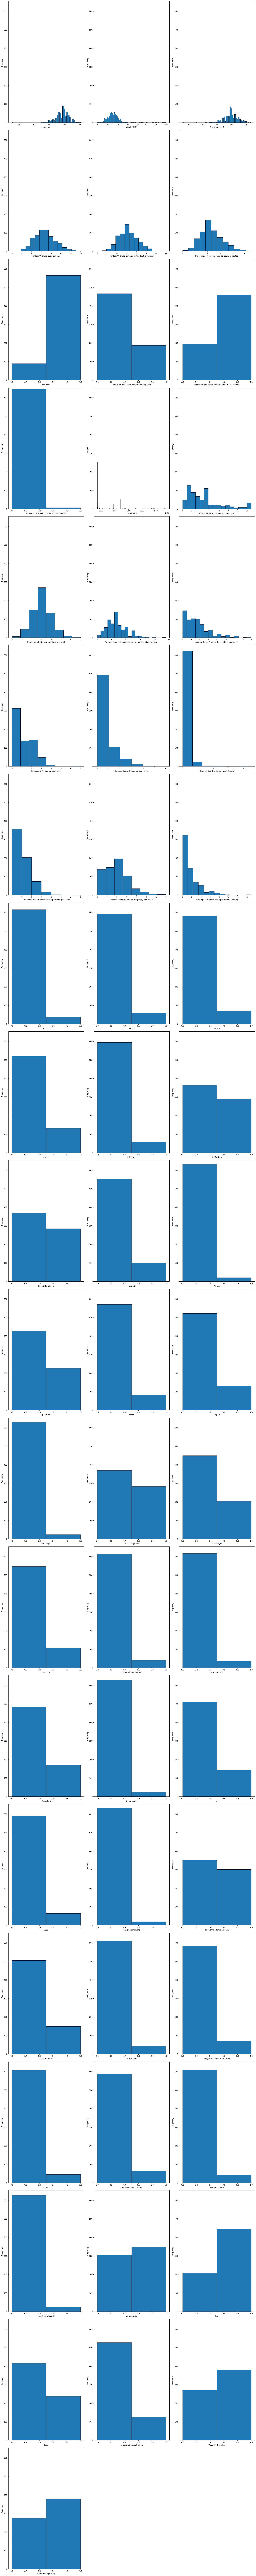

In [34]:
import matplotlib.pyplot as plt
import math

num_rows = len(Data)
num_columns = len(Data.columns)
plots_per_row = 3

num_plot_rows = math.ceil(num_columns / plots_per_row)
fig, axes = plt.subplots(num_plot_rows, plots_per_row, figsize=(20, 10 * num_plot_rows))
axes = axes.flatten()

for i, column in enumerate(Data.columns):
    ax = axes[i]
    value_counts = Data[column].value_counts()
    rounded_index = value_counts.index.round()
    value_counts = value_counts.groupby(rounded_index).sum().sort_index()
    ax.hist(Data[column], bins=value_counts.shape[0], edgecolor='black')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(column)
    ax.set_ylim(0, num_rows) # 0 to points in data set

# Hide subplots with no data (i.e. when plots mod 3 != 0)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/data_graphs.png', bbox_inches='tight')
plt.show()

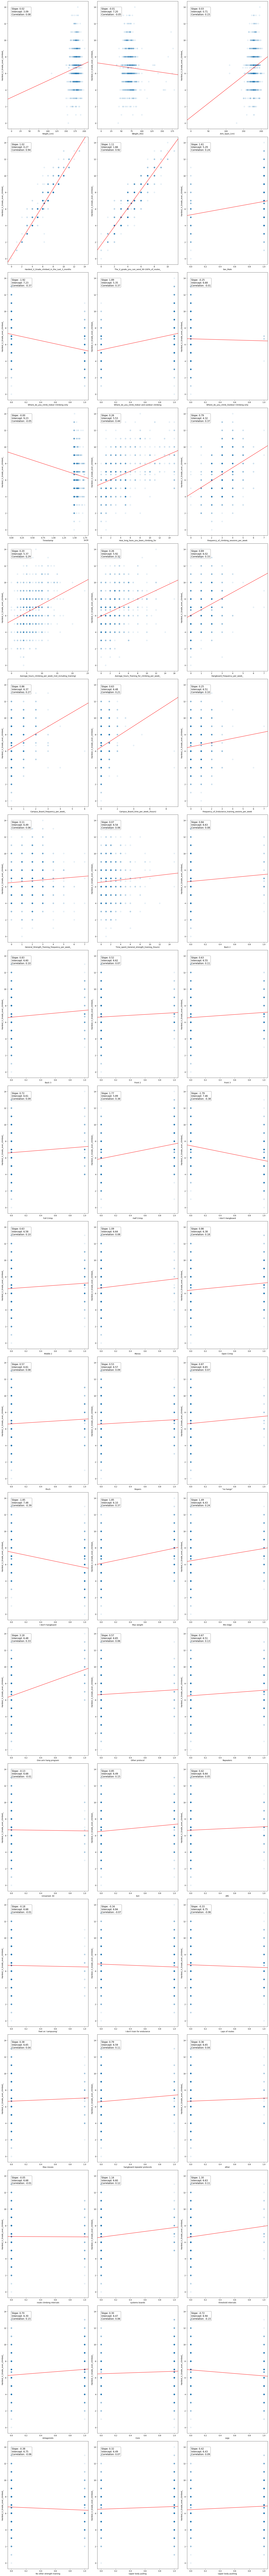

In [40]:
import numpy as np
fig, axes = plt.subplots(num_plot_rows, plots_per_row, figsize=(20, 10 * num_plot_rows))
axes = axes.flatten()
y_col = "Hardest_V_Grade_ever_climbed_"

for i, column in enumerate(Data.columns.drop(y_col)):
    ax = axes[i]
    x = Data[column]
    y = Data[y_col]
    
    # plot
    ax.scatter(x, y, alpha=0.1, s=50)
    ax.set_xlabel(column)
    ax.set_ylabel(y_col)
    
    # plot line of best fit
    slope, intercept = np.polyfit(x, y, deg=1)
    ax.axline((0, intercept), slope=slope, color='red', linestyle='-')

    # box of text info
    correlation = np.corrcoef(x, y)[0, 1]
    textstr = (
            f'Slope: {slope:.2f}\n'
            f'Intercept: {intercept:.2f}\n'
            f'Correlation: {correlation:.2f}'
        )
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Hide subplots with no data (i.e. when plots mod 3 != 0)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/correlation_graphs.png', bbox_inches='tight')
plt.show()